In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_match_time = pd.read_csv('match_time.csv')
df_match_time

,Unnamed: 0,match_id,total_peroid
0,0,12260075,7318.0
1,1,12260076,7827.0
2,2,12260077,10346.0
3,3,12260078,7171.0
4,4,12260080,5382.0
...,...,...,...
6109,9311,12384789,6819.0
6110,9312,12384806,10098.0
6111,9313,12384892,4063.0
6112,9314,12384975,14067.0


In [6]:
#open df_round
df_round = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_round.csv').drop_duplicates(subset='match_id')
df_round[['match_id','slug']]

,match_id,slug
0,12309624,qualification-round-1
1,12314724,round-of-32
2,12315404,round-of-32
3,12311404,round-of-128
4,12311900,round-of-128
...,...,...
11021,12295159,round-of-32
11022,12295490,round-of-32
11024,12297618,round-of-32
11026,12289656,round-of-32


In [7]:
df_match_time_with_round_type = df_match_time[['match_id','total_peroid']].merge(df_round[['match_id','slug']] , on='match_id',how='left')
df_match_time_with_round_type

,match_id,total_peroid,slug
0,12260075,7318.0,round-of-16
1,12260076,7827.0,round-of-16
2,12260077,10346.0,round-of-16
3,12260078,7171.0,quarterfinals
4,12260080,5382.0,round-of-16
...,...,...,...
6109,12384789,6819.0,semifinals
6110,12384806,10098.0,semifinals
6111,12384892,4063.0,final
6112,12384975,14067.0,semifinals


<Axes: xlabel='match_id', ylabel='total_peroid'>

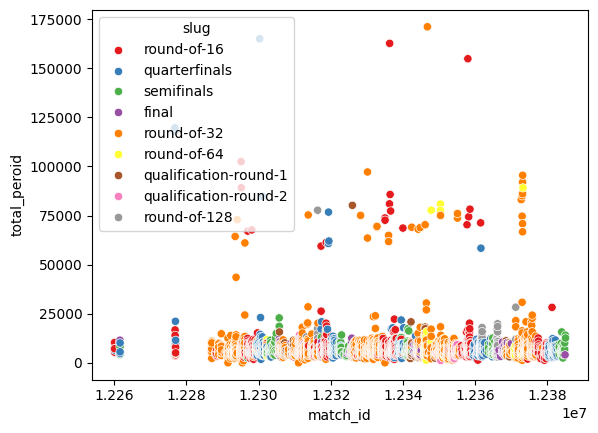

In [8]:

sns.scatterplot(x='match_id', y='total_peroid', hue='slug', data=df_match_time_with_round_type, palette='Set1')


In [10]:
df_match_time_with_surface_type_1 = df_match_time_with_round_type.groupby('slug')['total_peroid'].count().reset_index()
df_match_time_with_surface_type_2 = df_match_time_with_round_type.groupby('slug')['total_peroid'].mean().reset_index()
df_match_time_with_surface_type = df_match_time_with_surface_type_1.merge(df_match_time_with_surface_type_2,on='slug').rename(columns={'total_peroid_x': 'number_of_match', 'total_peroid_y': 'match_time_mean','slug':'round_type'})
df_match_time_with_surface_type.sort_values(by='match_time_mean')


,round_type,number_of_match,match_time_mean
2,qualification-round-2,74,6256.175676
0,final,129,6611.775194
1,qualification-round-1,380,6665.521053
8,semifinals,287,6708.121951
6,round-of-32,2175,7406.931954
5,round-of-16,1077,7910.159703
3,quarterfinals,614,8054.491857
4,round-of-128,146,8867.856164
7,round-of-64,128,9026.789062


So there is no relationship between getting closer to the final rounds and the time of the match